In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# I choose 'GlobalLandTemperaturesByMajorCity.csv' this data to analyze.
# This dataset includes the temperature of the major cities from 1849 to 2013.
# Firstly, let's take a look at the hottest cities in 1849 and 2013. 

In [59]:
# load the data
MajorCity = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv', index_col='dt', parse_dates=[0])

In [60]:
# get the top five hottest cities in 1849 
MajorCity[MajorCity.index.year == 1849][['City','Country','AverageTemperature']].groupby(
    ['City','Country']).mean().sort_values('AverageTemperature',ascending=False).head()

,,AverageTemperature
City,Country,
Madras,India,27.844917
Bangkok,Thailand,26.617083
Fortaleza,Brazil,26.421500
Hyderabad,India,26.260250
Rangoon,Burma,26.136917


In [69]:
# get the top five hottest cities in 2013
MajorCity[MajorCity.index.year == 2013][['City','Country','AverageTemperature']].groupby(
    ['City','Country']).mean().sort_values('AverageTemperature',ascending=False).head()

,,AverageTemperature
City,Country,
Umm Durman,Sudan,30.650500
Madras,India,30.411750
Bangkok,Thailand,28.984750
Jiddah,Saudi Arabia,28.875875
Hyderabad,India,28.851250


In [70]:
# Then I will focus on China.
# Let's see Chinese cities maximum temperatures

In [71]:
cities = MajorCity['City'].unique()
Chinese_cities = {'Changchun', 'Chengdu' , 'Chongqing' , 'Dalian', 'Guangzhou', 'Harbin',
                  'Jinan','Nanjing', 'Peking' , 'Shanghai', 'Shenyang', 'Taiyuan', 'Tangshan', 'Tianjin', 'Wuhan', 'Xian'}

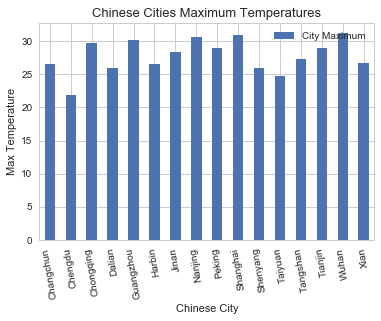

In [95]:
cc = pd.DataFrame(MajorCity)       
max_majorcity = cc.groupby(['City']).max()['AverageTemperature']
max_majorcity = max_majorcity.to_frame().reset_index()
max_majorcity.columns = ['City','City Maximum']
max_majorcity = max_majorcity.loc[max_majorcity['City'].isin(Chinese_cities)]

# plot the Chinese Cities Maximum Temperatures
ax = max_majorcity.plot.bar(xticks=max_majorcity.index, rot=100)
ax.set_xticklabels(max_majorcity.City)
plt.xlabel("Chinese City")
plt.ylabel("Max Temperature")
plt.title('Chinese Cities Maximum Temperatures',fontsize=13)

C:\Users\hengj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


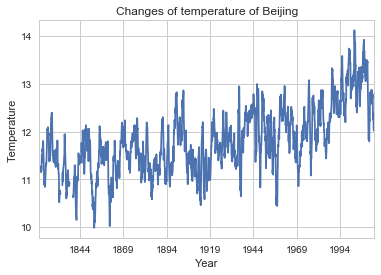

In [98]:
# Finally, let's look at the changes of temperature of China's three major cities: Beijing, Shanghai and Guangzhou.
pd.rolling_mean(MajorCity[MajorCity['City'] == 'Peking']['AverageTemperature'],window=12).plot(x=MajorCity.index)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title('Changes of temperature of Beijing')

C:\Users\hengj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


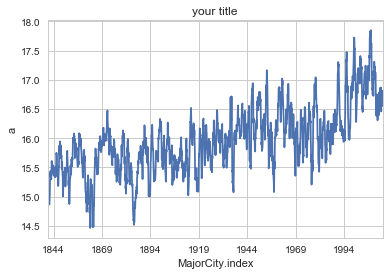

In [96]:
pd.rolling_mean(MajorCity[MajorCity['City'] == 'Shanghai']['AverageTemperature'],window=12).plot(x=MajorCity.index)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title('Changes of temperature of Shanghai')

C:\Users\hengj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


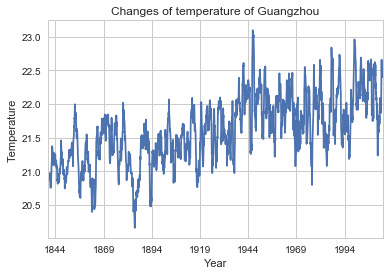

In [99]:
pd.rolling_mean(MajorCity[MajorCity['City'] == 'Guangzhou']['AverageTemperature'],window=12).plot(x=MajorCity.index)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title('Changes of temperature of Guangzhou')